<a href="https://colab.research.google.com/github/jypara/NBD_assigns/blob/master/Lab7_dz_Digital_filters_en_s20086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Digital Filters

## FIR

Finite Impulse Response filters perform a convolution with a sequence of parameters determining the chosen filter. Let's say we have a 2 Hz signal mixed with some white noise with low amplitude. 

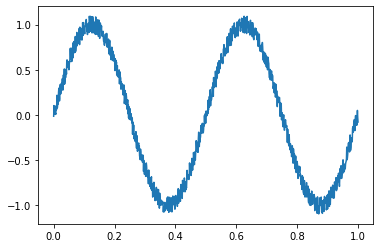

In [ ]:
T=1
Fs=1000
f=2
t=linspace(0,T,T*Fs)
y=sin(2*pi*f*t)+random.uniform(low=-0.1,high=0.1,size=t.size)
plot(t,y)

How can we remove the noise without sacrificing the original signal? Let's try using convolution to compute for each sample a mean of $N$ previous samples.

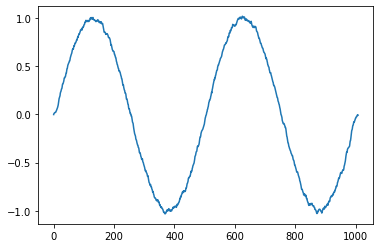

In [ ]:
N=10
h=ones(N)/N
z=convolve(y,h)
plot(z)

Let's see what this set of coefficients does in the sampling frequency. Do the Fourier Transform of the coefficients and plot its amplitude and phase spectra. Use zero-padding to increase the resolution. What does this filter do? Also check out the `scipy.signal.freqz` function.

Text(0, 0.5, 'Phase')

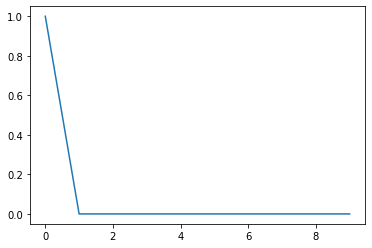

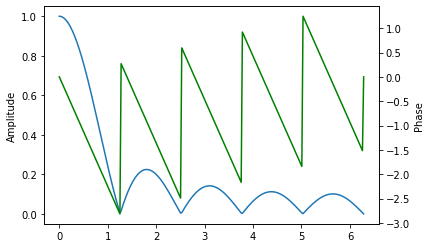

In [ ]:
H=fft.fft(h)
plot(abs(H))
figure()
h2=zeros(512)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
plot(f,angle(H),'g')
ylabel('Phase')

Instead of the mean, use a Gaussian.You can find it in `scipy.signal.gaussian`. What is the difference in this function's spectrum? 

Text(0, 0.5, 'Phase')

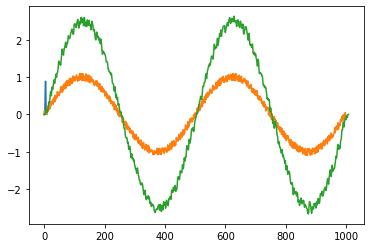

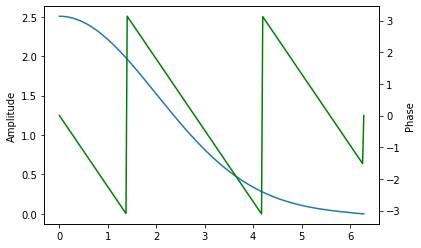

In [ ]:
from scipy.signal import gaussian
N=10
h=gaussian(N,N/10)
plot(h)
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(512)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
plot(f,angle(H),'g')
ylabel('Phase')

Now also try the `np.sinc` function.

Text(0, 0.5, 'Phase')

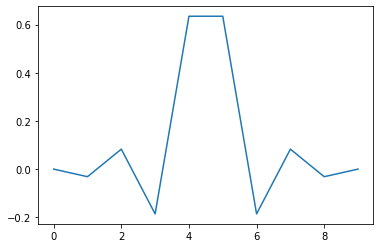

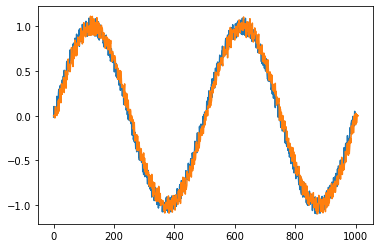

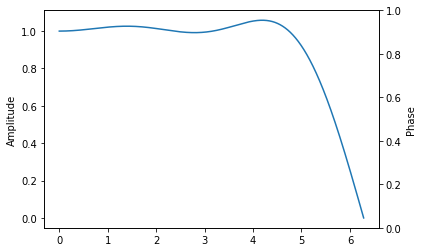

In [ ]:
from scipy.signal import gaussian
N=10
h=sinc(linspace(-5,5,N))
h/=h.sum()
plot(h)
figure()
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')

All the previous filters were low-pass. How can we make a high-pass filter? Try flipping the sign of every other coefficient.

Text(0, 0.5, 'Phase')

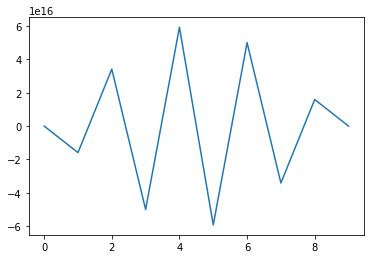

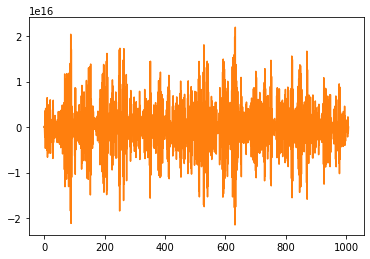

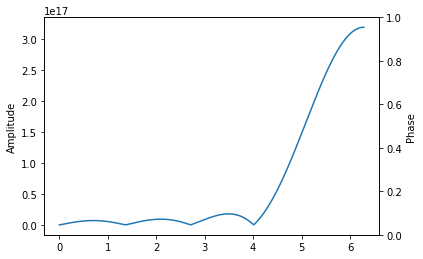

In [ ]:
from scipy.signal import gaussian
N=10
h=sinc(linspace(-1,1,N))
h[::2]*=-1
h/=h.sum()
plot(h)
figure()
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')

Lets combine a low- and a high-pass filter to get a band-pass or a band-stop filter.

Text(0, 0.5, 'Phase')

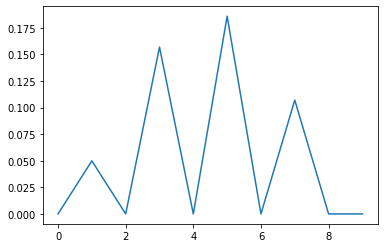

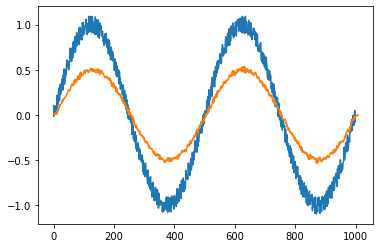

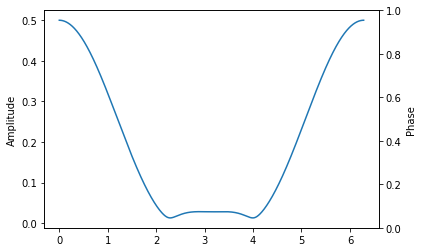

In [ ]:
from scipy.signal import gaussian
N=10
hlo=sinc(linspace(-1,1,N))
hlo/=hlo.sum()

hhi=hlo.copy()
hhi[::2]*=-1

h=(hlo+hhi)/2
plot(h)
figure()
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')

What happens if we take a sine of a specific frequency as our filter coefficients? 

Text(0, 0.5, 'Phase')

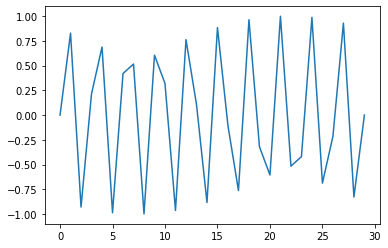

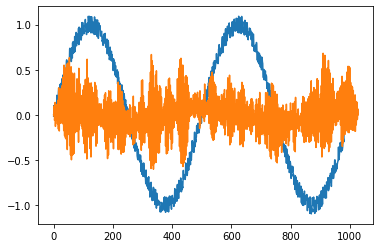

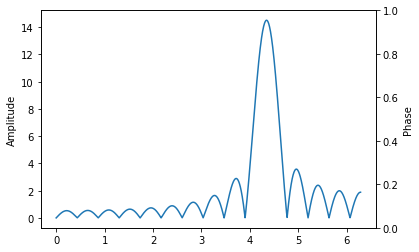

In [ ]:
from scipy.signal import gaussian
N=30
F=10
t=linspace(0,1,N)
h=sin(2*pi*F*t)
plot(h)
figure()
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')

Use the *scipy.signal.firwin* to generate a filter using a specific window function.

Text(0, 0.5, 'Phase')

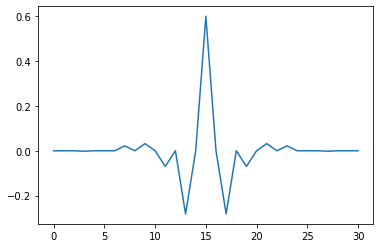

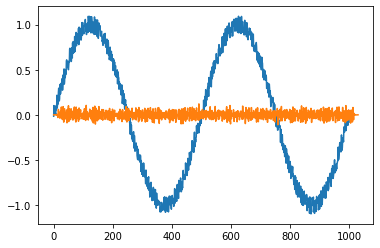

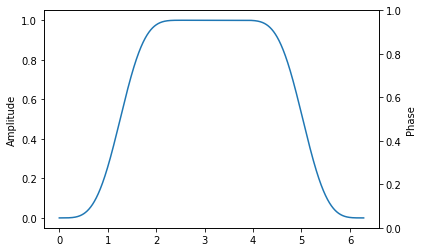

In [ ]:
from scipy.signal import firwin

from scipy.signal import gaussian
N=31
t=linspace(0,1,N)
h=firwin(N,[100,400],fs=Fs,window='blackman',pass_zero=False)

plot(h)
figure()
z=convolve(y,h)
plot(y)
plot(z)
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')

## IIR

Infinite impulse response filters are more complicated and can easily become unstable. Design an IIR filter using the `scipy.signal.butter` function. Use the `scipy.signal.freqz` function to see the filter's frequency response. The `scipy.signal.lfilter` function can be used to apply the filter on a signal.  

Reasonable values for the Butterworth filter are $N=19$ amd $W_n=0.5$.

0.012488070092685696
0.0124880700926856


Text(0, 0.5, 'Phase')

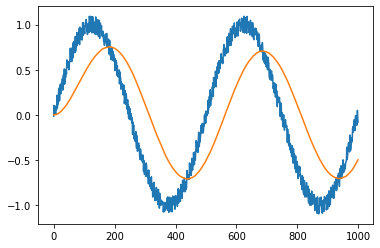

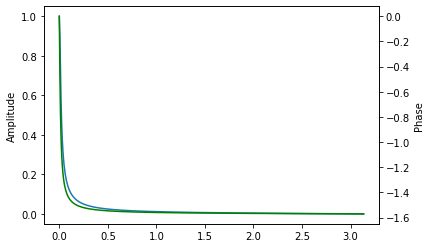

In [ ]:
from scipy.signal import butter,freqz,lfilter

Fs=1000
f=2


N=1
a,b=butter(N,f*2/Fs)

z=lfilter(a,b,y)
plot(y)
plot(z)
print(a.sum())
print(b.sum())
f,H=freqz(a,b)
figure()
plot(f,abs(H))
ylabel('Amplitude')
twinx()
plot(f,angle(H),'g')
ylabel('Phase')

Try designing an elliptic filter using the `scipy.signal.ellip` function with parameters $N=10$, $rp=0.1$, $rs=10$ and $Wn=0.5$.

Text(0, 0.5, 'Phase')

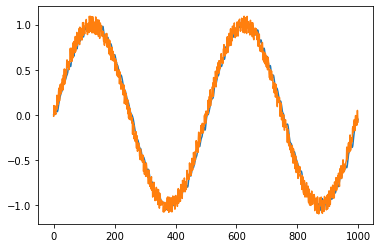

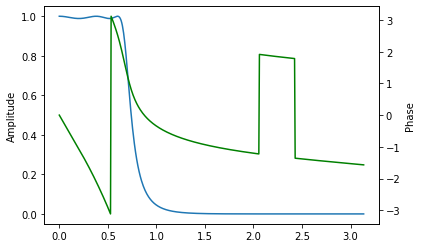

In [ ]:
from scipy.signal import ellip

N=5
a,b=ellip(N,0.1,100,100,fs=Fs)
#b[1]=100
z=lfilter(a,b,y)
plot(z)
plot(y)
f,H=freqz(a,b)
figure()
plot(f,abs(H))
ylabel('Amplitude')
twinx()
plot(f,angle(H),'g')
ylabel('Phase')

Compute the impulse response of the filter.

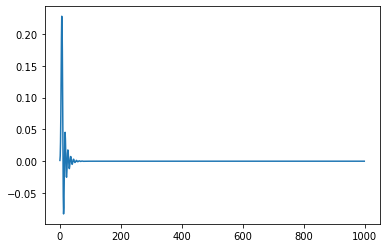

In [ ]:
i=zeros(1000)
i[0]=1
z=lfilter(a,b,i)
plot(z)


Check if the filter is stable. An IIR filter is stable if the absolute values of the roots of the denominator of its transfer function is less than 1. You can use the `np.roots` function to calculate the roots of a polynomial.

In [ ]:
if all(abs(roots(b))<1):
   print("stable")
else:
  print("unstable")


stable


Plot a pole/zero graph for a given filter.  You can use the `matplotlib.patches` module to draw the unit circle, eg:

```
ax.add_patch(patches.Circle((0,0), radius=1, fill=True, color='black', ls='dashed', alpha=0.5))
```

To get the poles and zeros, you can use the `scipy.signal.tf2zpk` function.

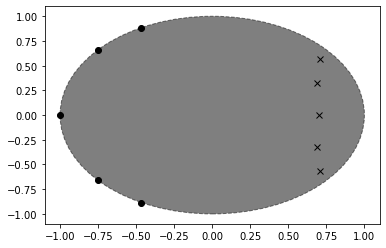

In [ ]:
from scipy.signal import tf2zpk
from matplotlib.patches import Circle
z,p,k=tf2zpk(a,b)
ax=axes()

ax.add_patch(Circle((0,0),radius=1,fill=True,color='black',ls='dashed',alpha=0.5))
plot(z.real,z.imag,'ok')
plot(p.real,p.imag,'xk')

# Homework

## 1. FIR filter

Create a signal with three components: 1 kHz, 2 kHz and 3 kHz. Create an FIR filter to remove the middle, 2 kHz component.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'Phase')

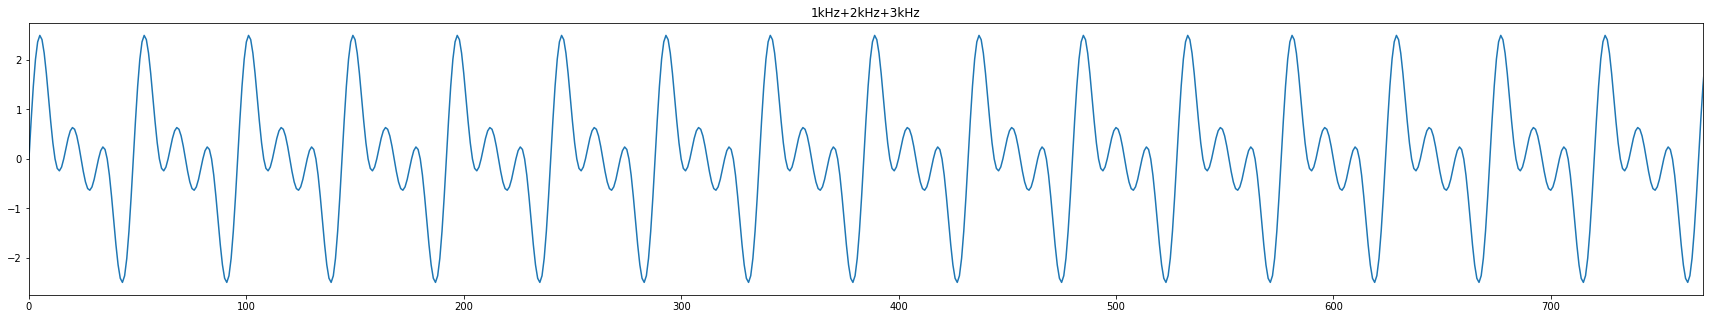

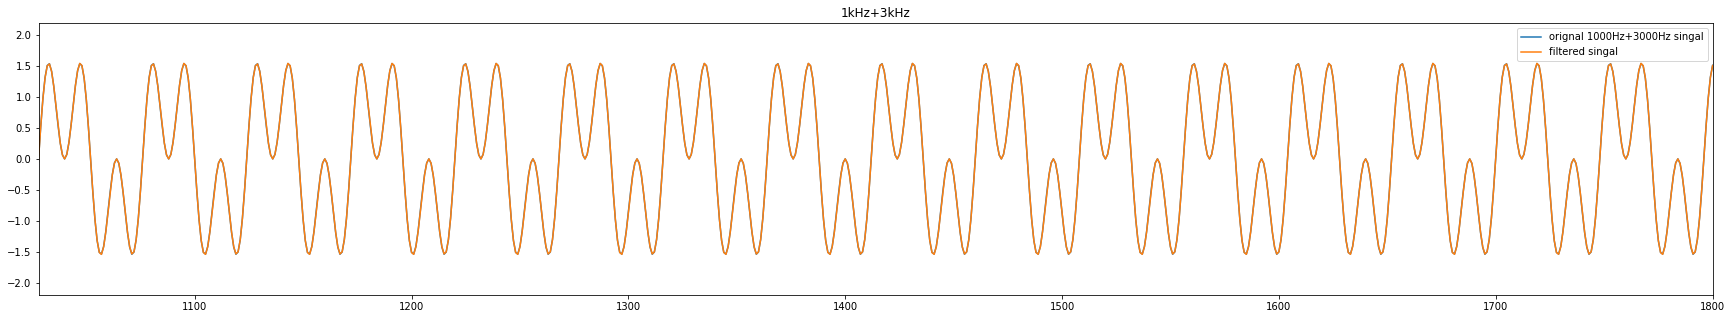

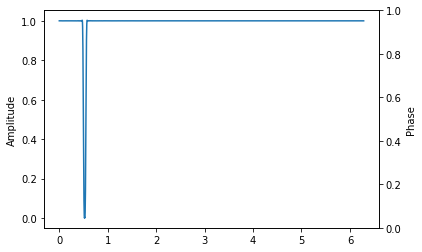

In [ ]:
%pylab inline
T=1
Fs=48000
t=linspace(0,T,T*Fs)
y=sin(2*pi*t*1000)+sin(2*pi*t*2000)+sin(2*pi*t*3000)
figure(figsize=(30,5))
xlim(0,770)
title('1kHz+2kHz+3kHz')
plot(y)
from scipy.signal import firwin
N=1001
h=firwin(N,[1900,2100],fs=Fs,pass_zero=True)
z=convolve(y,h)

figure(figsize=(30,5))
title('1kHz+3kHz')
xlim(1028,1800)
y=sin(2*pi*t*1000)+sin(2*pi*t*3000)
plot(y[28:],label='orignal 1000Hz+3000Hz singal')
plot(z,label='filtered singal')
legend()
figure()

h2=zeros(4096)
h2[:h.size]=h
H=fft.rfft(h2)
f=linspace(0,2*pi,H.size)
plot(f,abs(H))
ylabel('Amplitude')
twinx()
#plot(f,angle(H),'g')
ylabel('Phase')


## 2. IIR filter

Use the same signal above, but create an IIR filter instead. Make sure the filter is stable.

Populating the interactive namespace from numpy and matplotlib
stable


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


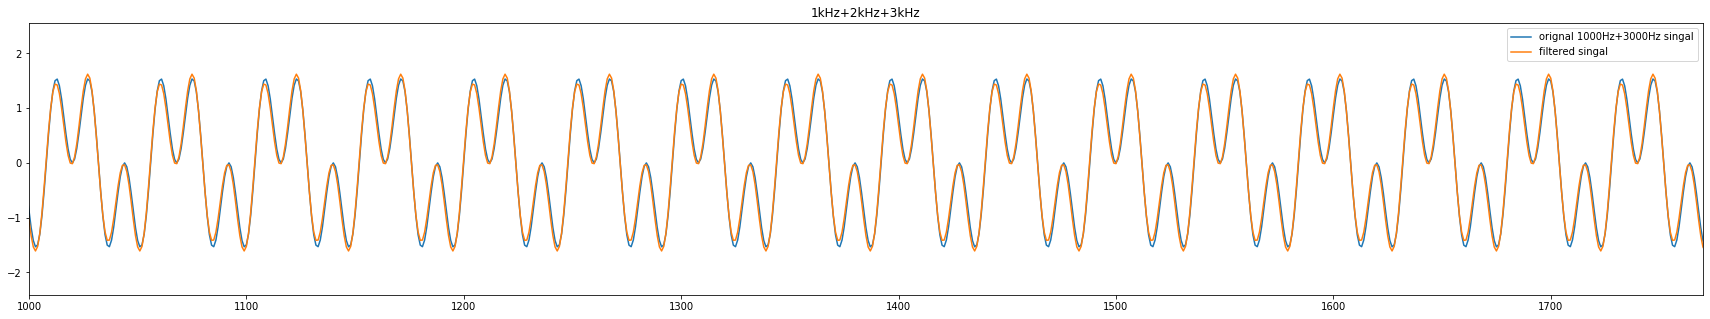

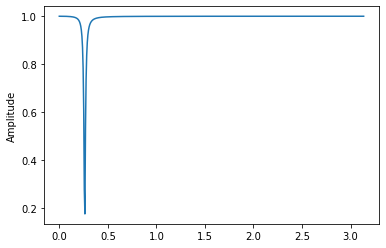

In [ ]:
%pylab inline
T=1
Fs=48000
t=linspace(0,T,T*Fs)
y=sin(2*pi*t*1000)+sin(2*pi*t*2000)+sin(2*pi*t*3000)
figure(figsize=(30,5))
xlim(1000,1770)
title('1kHz+2kHz+3kHz')

a,b=butter(1,[1900*2/Fs,2100*2/Fs],'stop')

z=lfilter(a,b,y)

y=sin(2*pi*t*1000)+sin(2*pi*t*3000)
plot(y,label='orignal 1000Hz+3000Hz singal')
plot(z,label='filtered singal')
legend()
f,H=freqz(a,b)
figure()
plot(f,abs(H))
ylabel('Amplitude')
if all(abs(roots(b))<1):
   print("stable")
else:
  print("unstable")